In [2]:
import numpy as np
import pandas as pd


In [3]:
from piml import Experiment 
exp=Experiment(highcode_only=True)

In [4]:
income0=pd.read_csv("data/adult.csv")
income0.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
income0.dropna(inplace=True)
income0.to_csv('data/adult_cl.csv', index=False)


In [5]:
income1=pd.read_csv("data/adult_cl.csv")
income1.isnull().sum()
income1.shape

(45222, 15)

### FEATURE ENGINEERING

In [6]:
income1['target'] = income1['income'].map({'<=50K': 0, '>50K': 1})
income1.drop('income', axis=1, inplace=True)
income1.drop('educational-num',axis=1,inplace=True)
income1.drop('native-country',axis=1,inplace=True)
income1.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,target
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,0


In [7]:
income1['education'].replace('Preschool', 'IncompleteED',inplace=True)
income1['education'].replace('10th', 'IncompleteED',inplace=True)
income1['education'].replace('11th', 'IncompleteED',inplace=True)
income1['education'].replace('12th', 'IncompleteED',inplace=True)
income1['education'].replace('1st-4th', 'IncompleteED',inplace=True)
income1['education'].replace('5th-6th', 'IncompleteED',inplace=True)
income1['education'].replace('7th-8th', 'IncompleteED',inplace=True)
income1['education'].replace('9th', 'IncompleteED',inplace=True)
income1['education'].replace('Some-college', 'CommunityCollege',inplace=True)
income1['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
income1['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)


In [8]:
income1['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
income1['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
income1['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
income1['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
income1['marital-status'].replace(['Separated'], 'Separated',inplace=True)
income1['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
income1['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [9]:
income1.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,target
0,25,Private,226802,IncompleteED,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,89814,HS-grad,Married,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,336951,CommunityCollege,Married,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,160323,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,34,Private,198693,IncompleteED,NotMarried,Other-service,Not-in-family,White,Male,0,0,30,0


In [10]:
jk=exp.data_loader(data=income1)


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,target
0,25,Private,226802,IncompleteED,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,89814,HS-grad,Married,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,336951,CommunityCollege,Married,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,160323,CommunityCollege,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,34,Private,198693,IncompleteED,NotMarried,Other-service,Not-in-family,White,Male,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302,CommunityCollege,Married,Tech-support,Wife,White,Female,0,0,38,0
45218,40,Private,154374,HS-grad,Married,Machine-op-inspct,Husband,White,Male,0,0,40,1
45219,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0
45220,22,Private,201490,HS-grad,NotMarried,Adm-clerical,Own-child,White,Male,0,0,20,0


## EDA

In [11]:
exp.eda()

## DATA PREPARATION

In [12]:
exp.data_prepare()


## MODEL TRAINING

In [13]:
exp.model_train()

## INTERPRETABILITY

In [14]:
exp.model_explain()

## WEAKSPOT ANALYSIS

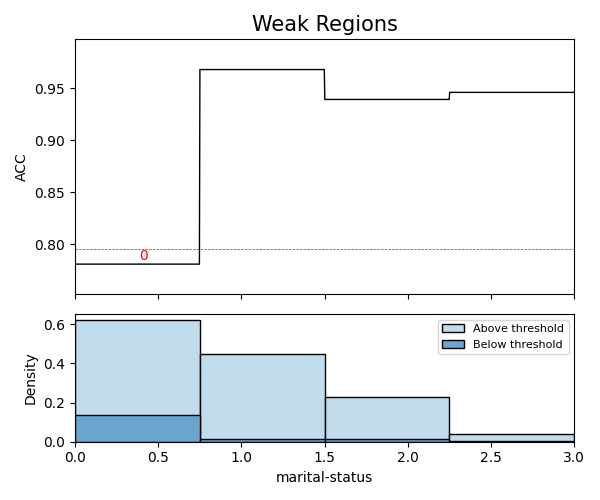

In [30]:
exp.model_diagnose(model="EBM", show="weakspot", metric="ACC",
          slice_method="histogram", slice_features=["marital-status"],
          threshold=1.1, min_samples=20, use_test=False, figsize=(6,5))

## MAPPING OF INTERNAL CATEGORIES TO DATA LABELS

In [24]:
income1['marital-status'] = income1['marital-status'].astype('category')

# Generate the mapping from category labels to integer codes
marital_mapping = dict(enumerate(income1['marital-status'].cat.categories))

# Print the mapping
print(marital_mapping)

{0: 'Married', 1: 'NotMarried', 2: 'Separated', 3: 'Widowed'}


## RELIABILITY ANALYSIS

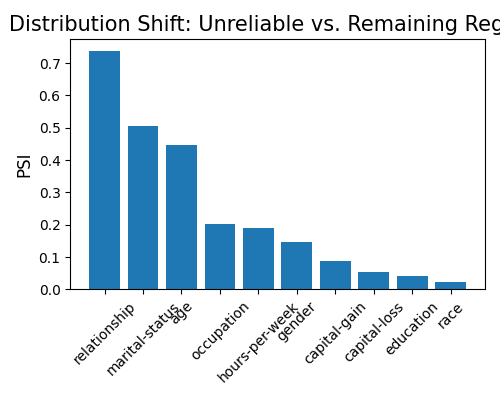

In [28]:
exp.model_diagnose(model="EBM", show="reliability_distance",
                   threshold=1.1, distance_metric="PSI", figsize=(5, 4))

## ROBUSTNESS ANALYSIS

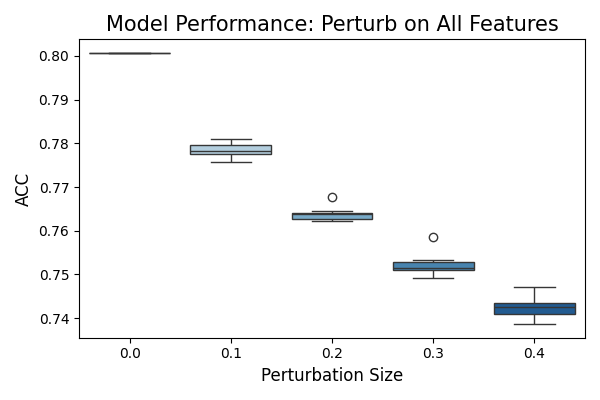

In [15]:
exp.model_diagnose(model="XGB1", show='robustness_perf', perturb_features=None,
                  perturb_method="quantile", metric="ACC", perturb_size=0.1, figsize=(6, 4))

## SEGMENT DIAGNOSTICS

In [15]:
result = exp.segmented_diagnose(model='XGB1', show='segment_table',
         segment_method='uniform', segment_feature='education', 
         segment_bins=5, return_data=True)

,Segment ID,Feature,Segment,Size,ACC
0,0,education,2.000000,106,0.462264
1,1,education,5.000000,485,0.550515
2,2,education,6.000000,167,0.610778
3,3,education,0.000000,1538,0.711313
4,4,education,1.000000,2712,0.803835
5,5,education,3.000000,2938,0.854323
6,6,education,4.000000,1099,0.946315


## DETAILED SEGMENT ANALYSIS

In [18]:
result = exp.segmented_diagnose(model='XGB1', show='accuracy_table', segment_id=0, segment_feature='education', return_data=True)


,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.4863,0.7679,0.4706,1.1093,0.3762
Test,0.4623,0.7821,0.4124,1.1401,0.3906
Gap,-0.0240,0.0143,-0.0582,0.0308,0.0144
